<a href="https://colab.research.google.com/github/KyungRyeolBaek/study/blob/main/ai03_sc11x_%EB%B0%B1%EA%B2%BD%EB%A0%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS SC11x

## Data Preprocessing & Exploratory Data Analysis

## Data Preprocessing

이번 파트에서는 [Gapminder](https://www.gapminder.org/about-gapminder/)의 데이터를 다루게 됩니다.

데이터는 3가지로 구성되어 있으며 description은 다음과 같습니다.

- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data1.csv>
- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data2.csv>
- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data3.csv>

### data1

|geo|time|cell_phones_total|
|:-:|:-:|:-:|
|kor|2017|63658688|
|kor|2018|66355778|
|kor|2019|68892541|

- 지역, 연도, 통화수

### data2

|geo|time|population|
|:-:|:-:|:-:|
|kor|2017|51096415|
|kor|2018|51171706|
|kor|2019|51225308|

- 지역, 연도, 인구수

### data3

|geo|country|
|:-:|:-:|
|kor|South Korea|

- 지역, 나라 이름

### 1. Load and Explore the Data

- 데이터셋을 데이터프레임으로 불러오세요.
- 결측데이터를 확인하세요.
- `time` vs `cell_phones_total`에 대해서 `scatter plot`을 그리세요.


In [213]:
import pandas as pd
import matplotlib.pyplot as plt

data1 = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data1.csv')
data1.dropna()

,Unnamed: 0,geo,time,cell_phones_total
0,0,abw,1960,0.0
1,1,abw,1965,0.0
2,2,abw,1970,0.0
3,3,abw,1975,0.0
4,4,abw,1976,0.0
...,...,...,...,...
9569,9569,zwe,2015,12757410.0
9570,9570,zwe,2016,12878926.0
9571,9571,zwe,2017,14092104.0
9572,9572,zwe,2018,12908992.0


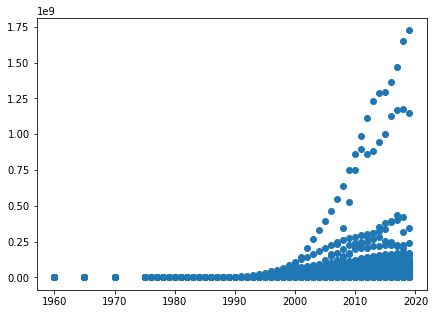

In [214]:
plt.figure(figsize=(7, 5))
plt.scatter(data1['time'], data1['cell_phones_total'])
plt.show()

In [215]:
data2 = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data2.csv')
data2.dropna()
# plt.figure(figsize=(7, 5))
# plt.scatter(data2['time'], data2['cell_phones_total'])
# plt.show()

,Unnamed: 0,geo,time,population
0,0,abw,1950,38068
1,1,abw,1951,38267
2,2,abw,1952,38964
3,3,abw,1953,40148
4,4,abw,1954,41760
...,...,...,...,...
35329,35329,zwe,2096,30940779
35330,35330,zwe,2097,30952209
35331,35331,zwe,2098,30959811
35332,35332,zwe,2099,30964041


In [216]:
data3 = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data3.csv')
data3.dropna()

,Unnamed: 0,geo,country
0,0,abkh,Abkhazia
1,1,abw,Aruba
2,2,afg,Afghanistan
3,3,ago,Angola
4,4,aia,Anguilla
...,...,...,...
268,268,yem_south,South Yemen (former)
269,269,yug,Yugoslavia
270,270,zaf,South Africa
271,271,zmb,Zambia


### 2. Join data

다음 데이터를 만드세요. (shape = 9568 * 5)

|geo|time|cell_phones_total|population|country|
|:-:|:-:|:-:|:-:|:-:|
|abw|1960|0|54211|Aruba|
|...|...|...|...|...|
|zwe|2019|13195902.0|14645468|Zimbabwe|


In [217]:
pd.merge(left = data1, right =data2, how = 'left', on = ['time', 'geo'] )

,Unnamed: 0_x,geo,time,cell_phones_total,Unnamed: 0_y,population
0,0,abw,1960,0.0,10.0,54211.0
1,1,abw,1965,0.0,15.0,57360.0
2,2,abw,1970,0.0,20.0,59063.0
3,3,abw,1975,0.0,25.0,60657.0
4,4,abw,1976,0.0,26.0,60586.0
...,...,...,...,...,...,...
9569,9569,zwe,2015,12757410.0,35248.0,13814629.0
9570,9570,zwe,2016,12878926.0,35249.0,14030331.0
9571,9571,zwe,2017,14092104.0,35250.0,14236595.0
9572,9572,zwe,2018,12908992.0,35251.0,14438802.0


In [218]:
data = pd.merge(left = pd.merge(left = data1, right =data2, how = 'left', on = ['time', 'geo']), right = data3, how = 'left', on = 'geo').dropna()
data = data.drop([data.columns[0], data.columns[4], data.columns[6]], axis = 1)
data

,geo,time,cell_phones_total,population,country
0,abw,1960,0.0,54211.0,Aruba
1,abw,1965,0.0,57360.0,Aruba
2,abw,1970,0.0,59063.0,Aruba
3,abw,1975,0.0,60657.0,Aruba
4,abw,1976,0.0,60586.0,Aruba
...,...,...,...,...,...
9569,zwe,2015,12757410.0,13814629.0,Zimbabwe
9570,zwe,2016,12878926.0,14030331.0,Zimbabwe
9571,zwe,2017,14092104.0,14236595.0,Zimbabwe
9572,zwe,2018,12908992.0,14438802.0,Zimbabwe


In [219]:
data.shape

(9568, 5)

### 3. Feature Engineering

인구당 cell phone의 수를 표기한 `PPP`라는 feature를 추가하세요. 

그 결과로 2019년 한국에서 PPP가 1.3448이 나와야 합니다. (해당 내역을 보여주세요.)

In [220]:
data['PPP'] = data['cell_phones_total'] / data['population']
data_tem = data[data['country'] == 'South Korea']
data_tem[data_tem['time'] == 2019]

,geo,time,cell_phones_total,population,country,PPP
4805,kor,2019,68892541.0,51225308.0,South Korea,1.344893


### 4. Data Manipulation

각 나라별로 평균 PPP를 계산하세요.

In [221]:
data_group = data.groupby('country').mean().sort_values(by='PPP' ,ascending=False)[:10].sort_values(by='PPP', ascending = True)
data_group.drop([data_group.columns[0], data_group.columns[1], data_group.columns[2]], axis = 1)

,PPP
country,
United Arab Emirates,0.741916
Saudi Arabia,0.757034
Liechtenstein,0.806225
"Hong Kong, China",0.810664
"Macao, China",0.818130
Israel,0.840197
Serbia,0.951586
Curaçao,1.259227
Montenegro,1.574349


가장 많은 PPP 값을 갖는 top 10 country 를 구하세요.

다음과 비슷한 결과가 나와야 합니다. 

|country|PPP|
|:-:|:-:|
|are|0.741916|
|sau|0.757034|
|lie|0.806225|
|hkg|0.810664|
|mac|0.818130|
|isr|0.840197|
|srb|0.951586|
|nld_curacao|1.259227|
|mne|1.574349|
|sxm|1.899506|


## EDA
이번 파트에서는 **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)** 의 데이터를 다루게 됩니다.


아래의 코드는 이미 여러분들을 위해 준비되어 있습니다. 아래 cell 을 실행하면 자동으로 data 가 load 되며, `df`라는 이름의 dataframe 을 얻게 될 겁니다. 

(원하신다면 추가 EDA를 하셔도 상관없지만, 이번 파트에서의 요구사항은 아닙니다.)


In [222]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

cable_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/cable_weekly.csv'
online_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/online_weekly.csv'

cable = pd.read_csv(cable_news_url)
online = pd.read_csv(online_news_url)

merged = pd.merge(cable[['date', 'name', 'pct_of_all_candidate_clips']], online[['date', 'name', 'pct_of_all_candidate_stories']])
merged['date'] = pd.to_datetime(merged['date'], infer_datetime_format=True)
merged = merged.set_index('date')

unique_dates = list(set(merged.index.to_list()))

import datetime

joe_biden_cable_multiple = []
joe_biden_online_multiple = []

for date in unique_dates:
  #that_day = merged.loc[datetime.date(year=date.year, month=date.month, day=date.day)]
  str_date = str(date.year)+"-"+str(date.month) + "-" + str(date.day)
  that_day = merged.loc[str_date]

  joe_biden_cable_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_clips']
  not_joe_biden_cable_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_clips'].max()
  joe_biden_cable_multiple_of_max = joe_biden_cable_that_day / not_joe_biden_cable_max

  joe_biden_online_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_stories']
  not_joe_biden_online_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_stories'].max()
  joe_biden_online_multiple_of_max = joe_biden_online_that_day / not_joe_biden_online_max


  joe_biden_cable_multiple.append(joe_biden_cable_multiple_of_max.values[0])
  joe_biden_online_multiple.append(joe_biden_online_multiple_of_max.values[0])

df = pd.DataFrame({'date': unique_dates, 'biden_cable_multiple':joe_biden_cable_multiple, 'biden_online_multiple': joe_biden_online_multiple})
df = df.set_index('date')
df = df.sort_index()

data_for_graph = df.loc[datetime.date(2019, 4, 15):]
print(data_for_graph.shape)
data_for_graph.head()

(27, 2)


,biden_cable_multiple,biden_online_multiple
date,,
2019-04-21,3.087352,1.107492
2019-04-28,3.707641,1.295820
2019-05-05,2.805169,1.306122
2019-05-12,3.235849,1.045386
2019-05-19,2.494624,1.119588


아래의 그림을 따라 그리세요 :

<img src='https://fivethirtyeight.com/wp-content/uploads/2019/10/Mehta-Media1028-1028-1.png' width = 500>



여러분들이 새로 만들게 될 plot은 다음을 만족해야 합니다:
- `example`과 유사한 `Cable News` vs `Online News` 2개의 line graph가 보여야 합니다. 
- 각 라인은 각각 **다른** 색깔을 가져야 합니다. (위 `example` 과 반드시 같은 색일 필요는 없습니다)
- 타이틀을 다음 내용으로 만드세요. _"Biden's Ukraine-related media bump is fading"_


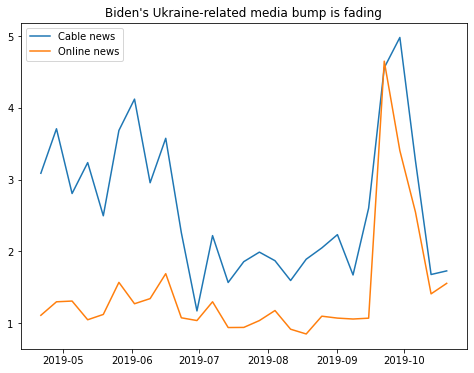

In [223]:
# data_for_graph
plt.figure(figsize=(8, 6))
plt.title("Biden's Ukraine-related media bump is fading")
plt.plot(data_for_graph['biden_cable_multiple'], label = 'Cable news')
plt.plot(data_for_graph['biden_online_multiple'], label = 'Online news')
plt.legend()
plt.show()

## SC 3점 요구사항:

위에서 요구된 사항들을 모두 정확하게 만족하였으며, 아직 시간이 남았다면 아래 2개의 내용들중 하나를 만족하는 경우 3점을 얻을 수 있습니다. 

아래 요구사항들은 모두 **optional** 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)

## 1. Data Preprocessing

- `cell_phones`dataframe 에서 필터를 걸어 USA 와 china 정보만 담게 하고, scatter plot 을 다시 그려 보세요. 

- geo code 를 lowercase가 아닌 uppercase 로 바꿔보세요. 

- 2017년은 China가 people(인구수)보다 cell phone 개수가 더 많아지는 첫번째 년도 입니다. 
미국의 경우, cell phone의 개수가 people 보다 더 많아지는 첫번째 년도는 언제인가요?

## 2. EDA

- 주어진 fivethirtyeight 그림 차트와 완벽히 동일하게 그려보세요. 


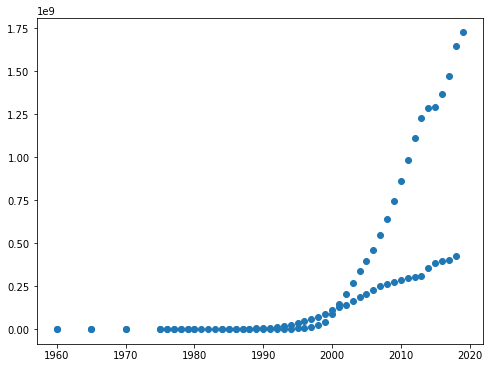

In [224]:
data_challenge = data[(data['country'] == 'United States') | (data['country'] == 'China')]

plt.figure(figsize= (8, 6))
plt.scatter(data_challenge['time'], data_challenge['cell_phones_total'])
plt.show()

In [225]:
data['geo'] = data['geo'].apply(str.upper)
data

,geo,time,cell_phones_total,population,country,PPP
0,ABW,1960,0.0,54211.0,Aruba,0.000000
1,ABW,1965,0.0,57360.0,Aruba,0.000000
2,ABW,1970,0.0,59063.0,Aruba,0.000000
3,ABW,1975,0.0,60657.0,Aruba,0.000000
4,ABW,1976,0.0,60586.0,Aruba,0.000000
...,...,...,...,...,...,...
9569,ZWE,2015,12757410.0,13814629.0,Zimbabwe,0.923471
9570,ZWE,2016,12878926.0,14030331.0,Zimbabwe,0.917935
9571,ZWE,2017,14092104.0,14236595.0,Zimbabwe,0.989851
9572,ZWE,2018,12908992.0,14438802.0,Zimbabwe,0.894049


In [226]:
data_challenge_tem = data[data['country'] == 'United States']
data_challenge_tem[data_challenge_tem['cell_phones_total'] > data_challenge_tem['population']]
# 2014년 입니다.

,geo,time,cell_phones_total,population,country,PPP
9039,USA,2014,355500000.0,318673411.0,United States,1.115562
9040,USA,2015,382307000.0,320878310.0,United States,1.191439
9041,USA,2016,396000000.0,323015995.0,United States,1.225945
9042,USA,2017,400000000.0,325084756.0,United States,1.230448
9043,USA,2018,422000000.0,327096265.0,United States,1.290140


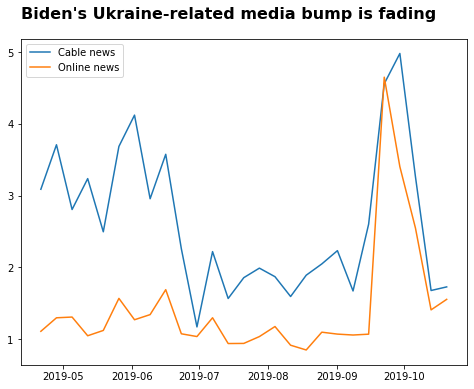

In [227]:
# data_for_graph
title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}
plt.figure(figsize=(8, 6))
plt.title("Biden's Ukraine-related media bump is fading", fontdict=title_font, loc='left', pad=20 )
plt.plot(data_for_graph['biden_cable_multiple'], label = 'Cable news')
plt.plot(data_for_graph['biden_online_multiple'], label = 'Online news')
plt.legend()
plt.show()

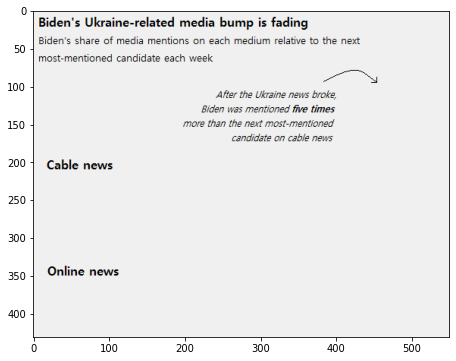

In [228]:
im = plt.imread("img.png")

plt.figure(figsize = (8, 6))
plt.imshow(im)
# plt.plot(data_for_graph)
plt.show()